In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ 

In [ ]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,690 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and d

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import re
import os
import sys
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/My Drive/프로젝트1/total_tokens_count2_nostopwords.csv'
token_count = pd.read_csv(file,encoding='utf-8')
token_count.columns = ["형태소", "빈도수"]
token_count.head()

,형태소,빈도수
0,맛집,169174
1,먹다,140290
2,카페,132028
3,여행,98317
4,식당,72271


In [ ]:
len(token_count)

45673

In [ ]:
# 상위 50개 단어뽑기 

In [ ]:
token_50 = token_count.iloc[:50]
token_50

,형태소,빈도수
0,맛집,169174
1,먹다,140290
2,카페,132028
3,여행,98317
4,식당,72271
5,좋다,61642
6,맛있다,60551
7,맛,43030
8,흑,42939
9,돼지,42359


In [ ]:
# 그래프 그려주기

In [ ]:
plt.rc('font', family='NanumBarunGothic') # 한글폰트 적용

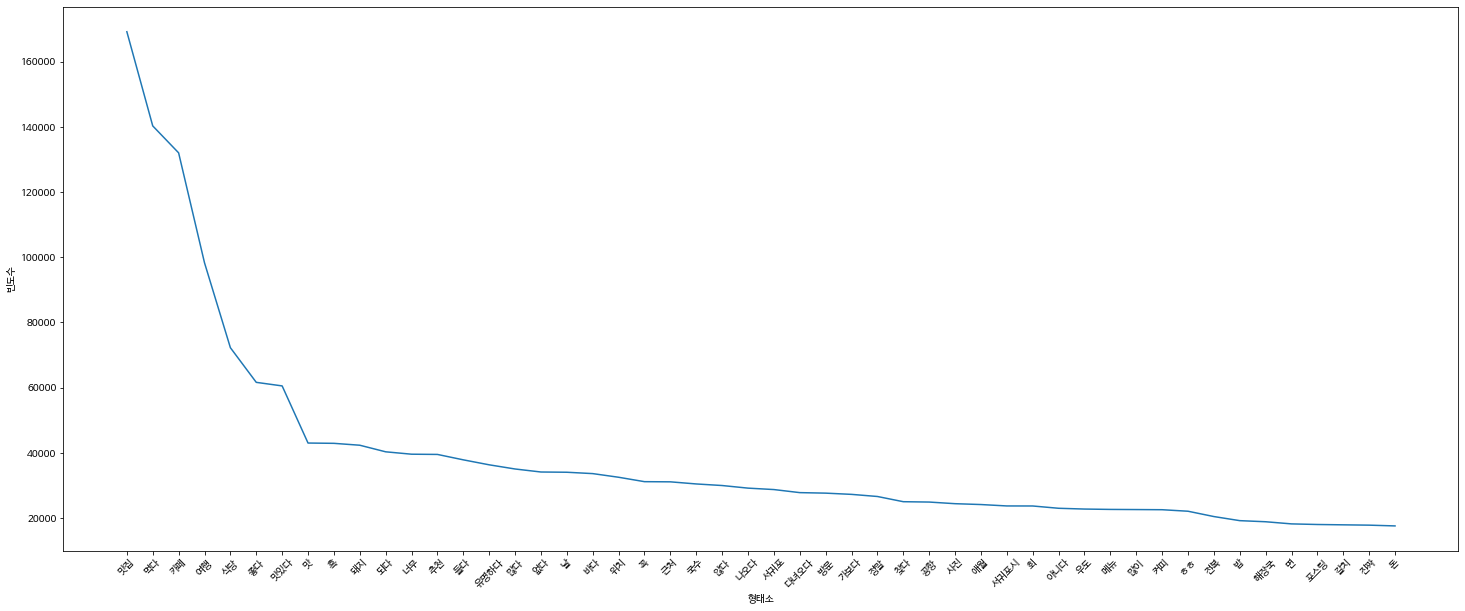

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45 )
sns.lineplot(x=token_50.형태소, y=token_50.빈도수)

In [ ]:
# 워드 클라우드

In [ ]:
background = np.array(Image.open('/content/drive/My Drive/프로젝트1/jeju.jpg'))
image_colors = ImageColorGenerator(background)

In [ ]:
token_dict = dict(zip(token_count.형태소, token_count.빈도수))

In [ ]:
wordcloud = WordCloud(max_font_size=200, font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                     background_color='white',
                     mask=background,
                     width=1200,height=800).generate_from_frequencies(token_dict)

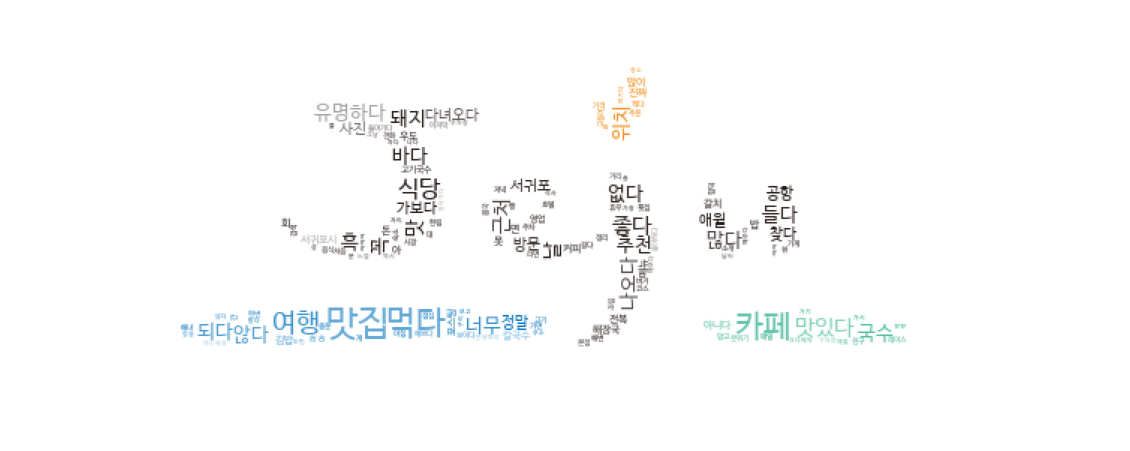

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show()

In [ ]:
# 광고 유무 사전 만들기

In [ ]:
token_count[token_count.형태소  == '교통']

,형태소,빈도수
6293,교통,85


In [ ]:
ad_ok_feature  = {'광고':['제공','업체','소정','대가','원고료','부터','소정의','제품을','제품','지원','받다','광고료','광고비']}

In [ ]:
# 감성 분석 사전 만들기 : 서비스,가격,교통,재방문의사
# 참고 사이트 : https://github.com/haesoly/estimate_review_of_restaurant, 군산대학교 감성분석 사전
# 찬주님과 같이 제작

In [ ]:
service_good_feature = {'서비스':['친절','좋다','최고','빠르다','빨리','훌륭','추천','감사','구수','최상','대박','훈훈','특별','개이득','만족','세련','감동','굿굿','ㅇㅈ','인정이 많고','인정있는'],
                        '사장':['친절','스윗','센스','상냥'],
                        '알바':['친절','스윗','센스','상냥'],
                        '직원': ['친절','스윗','센스','상냥']}

In [ ]:
service_bad_feature = {'서비스': ['아쉽','최악','나쁘다','느리다','빡치다','별로','엉망','실망','불친절','문제','거지','그닥','그다지','비추','구려','불편','헬','개판','구림','짜증','화남','낙제','정없다','어이'],
                       '알바':['불친절','재수','똑바로','싸가지','노어이'],
                       '사장':['불친절','재수','똑바로','싸가지','노어이'],
                       '직원':['불친절','재수','똑바로','싸가지','노어이']}

In [ ]:
taste_good_feature = {'간이':['적절','딱','환상','맞다','괜찮다','적절하게','적당한','적당하다','적절']
                      ,'간도':['적절','딱','환상','맞다','괜찮다','적절하게','적당한','적당하다','적절']
                      ,'음식':['괜찮다','깔끔','정갈','정갈하다']
                      ,'맛':['있다','굿굿','존맛','존맛탱','핵존맛','찐','최고','천국','극락','꿀맛','최상','고급']}

In [ ]:
taste_bad_feature = {'간이':['세','쎄','강하다','별로']
                     ,'간도':['세','쎄','강하다','별로']
                     ,'음식':['별로','쏘다쏘다','최악']
                     ,'맛':['별로','최악','노맛','쓰레기','버림','존노맛','노','싸구려','싼']}

In [ ]:
taste_good_emotion = ['고소','부드럽','신선','촉촉','싱싱','정갈','상큼하다','달콤하다','달콤한','부드러운','최고','고급']

In [ ]:
taste_bad_emotion = ['싱겁','느끼다하다','짜다','느끼다','짜다','딱딱하다','차갑다','싱겁다','짬','소금맛','비리다','느끼','노맛','핵노맛']

In [ ]:
cost_good_feature = {'가격': ['괜찮','착하다','저렴','적당','싸다','좋다','합리적','훌륭','최고','만족','마음','든든','알맞다','무난','괜춘','최상','최상','굿','엄지','낮','개쩜','굿굿','대박','쌈','개굿'],
                     '가성비':['괜찮','착하다','저렴','적당','싸다','좋다','합리적','훌륭','최고','만족','마음','든든','알맞다','무난','괜춘','최상','최상','굿','엄지','굿굿','개쩜','대박'],
                     '양도':['많','적당','푸다짐하고','괜찮다','넉넉','충분','든든','푸짐','많음','많다','대박','만족','만족스러운','혜자'],
                     '양이':['많','적당','푸다짐하고','괜찮다','넉넉','충분','든든','푸짐','많음','많다','대박','만족','만족스러운','혜자'],
                     '양은':['많','적당','푸다짐하고','괜찮다','넉넉','충분','든든','푸짐','많음','많다','대박','만족','만족스러운','혜자']}

In [ ]:
cost_bad_feature ={'가격': ['비싸','있다','나쁘','사악','비효율','높다','부담','아쉽','쏘다쏘다','별로','그닥','그다지','쎄','ㅎㄷㄷ','높','거품','ㄷㄷㄷ','높다'],
                   '가성비':['별로','최악','없음','불만족'],
                   '양이':['적다','작다','아쉽','적다','다소','별로'],
                   '양은':['적다','작다','아쉽','적다','다소','별로'],
                   '양도':['적다','작다','아쉽','적다','다소','별로']}

In [ ]:
visit_good_feature = {'의사':['있','충만','백프로','백프롭','많','만땅','마구','그득','만점','넘침','꼭','다시'],
                      '다시':['가다','오다','방문','찾다','가보다','한번','갈다','찾아가다','가야지','갈거다','방문하다보고','생각나다','방문한다면','와보고','재방문','접하다','간다면','갈다때가','먹다고프다','방문한다임','오자고','가기로','갈다생각이다','가면'],
                      '굳이':[]}

In [ ]:
visit_bad_feature = {'의사':['글쎄'],
                     '굳이':['다시','많이','여기까지','줄서서','찾아','시키다','가다','찾다','여기','기다리다','줄을','사먹'],
                     '다시':['안감','절대']}

In [ ]:
negative_word_emotion = ['안','않','못','없','아닌','아니']

In [ ]:
traffic_good_feature = {'버스': ['가깝','가까운','근거리','근','있','정류장','근처','도보','편한','편하','편리','좋','최고'], 
                        '공항':['가깝','가까운','근거리','근','근처','편리','좋','최고'], 
                        '주차장':['근처','공영','무료','있다','가깝','편리','좋','최고']}

In [ ]:
traffic_bad_feature = {'버스': ['멀','원거리','없다','없','택시','차','자동차','별로','불편','아쉽'], 
                       '공항':['멀','원거리','없','불편','아쉽'], 
                       '주차장':['없','유료','멀','없','불편','부족','아쉽']}

In [ ]:
# 블로그, 리뷰 불러오기
# 블로그 : 광고글 유무 판단, 리뷰 : 감정분석

In [ ]:
file_mango = '/content/drive/My Drive/프로젝트1/mango_df.csv'
mango = pd.read_csv(file_mango,encoding='utf-8')
mango.head()

,Unnamed: 0,Unnamed: 0.1,가게명,주소,Latitude,Longitude,점수,찜,음식 분야,해시태그,댓글
0,0,0,상춘재,제주특별자치도 제주시 조천읍 선진길 26,33.458659,126.704844,4.7,"4,707",한정식 / 백반 / 정통 한식,"['#비빔밥', '#제주도', '#2018 인기', '#Bibimbap', '#20...",['\n 다음 번에 제주도 간다면 첫 번째로 갈 집...!!!!진짜...
1,1,1,남양수산,제주특별자치도 서귀포시 성산읍 고성동서로56번길 11,33.450135,126.914224,4.6,"5,009",해산물 요리,"['#횟집', '#2020망고플레이트인기맛집', '#한식', '#2018 인기', ...","['\n 여기 너무맛있어용\n ', '\n ..."
2,2,2,선흘곶,제주특별자치도 제주시 조천읍 동백로 102,33.508187,126.718049,4.6,"3,212",한정식 / 백반 / 정통 한식,"['#2020망고플레이트인기맛집', '#아이와함께', '#제주 함덕', '#김녕',...",['\n 추석연휴가 있어서 그런듯 10시30분 오픈이라고 해서 갔는...
3,3,3,스시호시카이,제주특별자치도 제주시 오남로 90,33.481286,126.516769,4.5,"1,644",회 / 스시,"['#제주도', '#2018 인기', '#스시오마카세', '#초밥', '#Jeju'...","['\n 첫 오마카세를 제주도에서. 제주도 최초의 하이엔드 스시야,..."
4,4,4,미영이네식당,제주특별자치도 서귀포시 대정읍 하모항구로 42,33.217651,126.249904,4.5,"2,750",해산물 요리,"['#고등어', '#2020망고플레이트인기맛집', '#제주 모슬포', '#화순', ...","['\n 최신 메뉴판\n ', '\n ..."


In [ ]:
file_dining = '/content/drive/My Drive/프로젝트1/code_df.csv'
dining = pd.read_csv(file_dining,encoding='utf-8')
dining.head()

,Unnamed: 0,Unnamed: 0.1,가게명,주소,Latitude,Longitude,점수,찜,음식 분야,태그,댓글
0,0,0,우진해장국,제주특별자치도 제주시 삼도2동 831,33.511488,126.520086,92,947,"[' 고사리육개장, 몸국 ']","['다코매거진선정', ' 2019대표맛집', ' 수요미식회', ' 향토음식', ' ...",['자타가 공인하는 제주 최고 맛집으로 웨이팅 없이 쉽게 먹을 수 없는 곳~\n\n...
1,1,1,명진전복,제주특별자치도 제주시 구좌읍 평대리 515-28,33.532423,126.849854,87,1133,"[' 전복돌솥밥, 전복구이 ']","['2019대표맛집', ' 수요미식회', ' 줄서서먹는', ' 멋진풍경', ' 시골...",['후기 많은거 보고 무조건 찾아 갔다. 약간의 대기 끝에 드뎌 입장 일단 맨위의 ...
2,2,2,올래국수,제주특별자치도 제주시 연동 301-19,33.491500,126.497297,82,935,[' 고기국수 '],"['2019대표맛집', ' 수요미식회', ' 줄서서먹는', ' 향토음식', ' 원조...",['단일메뉴라서 인원수만 알려주면 됌 ㅎ\n사람많을때 익숙해선지 사람많르면 몇분정도...
3,3,3,자매국수 본점,제주특별자치도 제주시 일도2동 1034-10,33.508146,126.532427,82,700,"[' 고기국수, 돔베고기 ']","['2019대표맛집', ' 제주향토음식', ' 줄서서먹는', ' 원조', ' 간식'...",['제주도 오면 그냥 당연히 한번 가야 할것만 같은 그런곳이다. 국수 팔아서 건물 ...
4,4,4,오는정김밥,제주특별자치도 서귀포시 서귀동 256-26,33.249308,126.566585,80,583,"[' 깻잎김밥, 김밥 ']","['2019대표맛집', ' 식신로드', ' 먹거리X파일', ' 원조', ' 줄서서먹...",['제주도 오면 항상 먹는 김밥~전화를 너무 많이 해서 힘들지만 그래도 맛있다ㅠㅠ'...


In [ ]:
file_naver = '/content/drive/My Drive/프로젝트1/naver_review_data.csv'
naver = pd.read_csv(file_naver,encoding='utf-8')
naver.head()

,name,star_score,star_count,review_count,review_data
0,상춘재,4.50,484,199,"['친절해요', '멍개비빔밥 진짜 맛있어요 고등어 구이 비싼데 살살 녹아요♡', '..."
1,남양수산,4.60,109,39,"['고등어회, 지리 최고에요', '지리는꼭드세요.. 회먹다가 지리달라고하시면 주시더..."
2,선흘곶,4.45,238,95,['3년전부터 매년갔는데 점점 맛이변해가네요 반찬이영~~ 보쌈고기가너무 퍽퍽해요 이...
3,스시호시카이,4.66,31,14,"['완벽', '너무 맛있어요❤️🧡💛💚💙💜', '신혼여행 마지막날 저녁을 장식한 오마..."
4,미영이네식당,4.56,480,208,"['방어,참치 먹는 맛 ㅋㅋ 회알못도 맛있게 먹음. 회먹으러 갔다 탕에 반해옴 든든..."


In [ ]:
mango = mango[['가게명','댓글']]
dining = dining[['가게명','댓글']]
naver = naver[['name','review_data']]
naver.columns = ["가게명", "리뷰"]
mango.columns = ["가게명", "리뷰"]
dining.columns = ["가게명", "리뷰"]

In [ ]:
print(len(mango))
print(len(dining))
print(len(naver))

200
100
198


In [ ]:
total_df = mango.merge(naver,on='가게명',how='outer').merge(dining,on='가게명',how='outer')
total_df

,가게명,리뷰_x,리뷰_y,리뷰
0,상춘재,['\n 다음 번에 제주도 간다면 첫 번째로 갈 집...!!!!진짜...,"['친절해요', '멍개비빔밥 진짜 맛있어요 고등어 구이 비싼데 살살 녹아요♡', '...",['제주도 건강한 밥상\n문어비빔밥 : ★★★★☆ (문어가 많이들어가 있고 쌈을 싸...
1,남양수산,"['\n 여기 너무맛있어용\n ', '\n ...","['고등어회, 지리 최고에요', '지리는꼭드세요.. 회먹다가 지리달라고하시면 주시더...",NaN
2,선흘곶,['\n 추석연휴가 있어서 그런듯 10시30분 오픈이라고 해서 갔는...,['3년전부터 매년갔는데 점점 맛이변해가네요 반찬이영~~ 보쌈고기가너무 퍽퍽해요 이...,NaN
3,스시호시카이,"['\n 첫 오마카세를 제주도에서. 제주도 최초의 하이엔드 스시야,...","['완벽', '너무 맛있어요❤️🧡💛💚💙💜', '신혼여행 마지막날 저녁을 장식한 오마...",NaN
4,미영이네식당,"['\n 최신 메뉴판\n ', '\n ...","['방어,참치 먹는 맛 ㅋㅋ 회알못도 맛있게 먹음. 회먹으러 갔다 탕에 반해옴 든든...",NaN
...,...,...,...,...
265,살롱 드 라방,NaN,NaN,['전체적으로 맛있었어요! 내부 인테리어도 너무 예뻐서 맘에 들었고 조용해서 힐링했...
266,성읍 칠십리식당,NaN,NaN,['고기는 맛있습니다 다소 양이 적다는 느낌은 들지만 고사리와 콩나물과 함께 먹으니...
267,제주시새우리,NaN,NaN,['인스타 사진찍기 좋은 음식점 외관과 김밥입니다. 김만복과 새우리 비교를 많이 하...
268,다정이네,NaN,NaN,['근처 김밥집은 웨이팅이 있다는 소문을 듣고 기다리기 싫어 방문한 곳\n\n관광객...


In [ ]:
total_df.drop_duplicates('가게명', keep='first',inplace=True)

In [ ]:
total_df.to_csv('/content/drive/My Drive/프로젝트1/review_totals.csv',encoding='utf-8',index=False)

In [ ]:
# 리뷰 합치기 (찬주님)

In [ ]:
def clean_reviews(reviews):
    temp=reviews.split('\\n')
    r_list=[]
    for t in temp:
        text = re.sub('^[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', t.strip())
        if isinstance(text, str):
          pass
        elif isinstance(text, unicode):
          text = text.encode('utf-8', 'ignore').decode('utf-8') # 이모지 제거
        else :
          text = text.encode('ascii', 'ignore').decode('ascii')
        if len(text)>1:
            if re.match('^[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', text[0]):
                continue
            else:
                res="'"+text+"'"
                r_list.append(res)
    return r_list

In [ ]:
def list_to_string(review_list):
    result=""
    if len(review_list)>0:
        result = '. '.join(review_list)
    return result

In [ ]:
def clean_dining(reviews):
    return reviews[1:-1]

In [ ]:
total_df['리뷰_x']=total_df['리뷰_x'].fillna("").apply(lambda x: clean_reviews(x)).apply(lambda x: list_to_string(x))
total_df['리뷰_y']=total_df['리뷰_y'].fillna("").apply(lambda x: clean_dining(x))
total_df['리뷰']=total_df['리뷰'].fillna("").apply(lambda x: clean_reviews(x)).apply(lambda x: list_to_string(x))
total_df['리뷰']=total_df['리뷰_x']+total_df['리뷰_y']+total_df['리뷰']

In [ ]:
total_df.drop(['리뷰_y','리뷰_x'],axis=1,inplace=True)

In [ ]:
total_df

,가게명,리뷰
0,상춘재,'다음 번에 제주도 간다면 첫 번째로 갈 집...!!!!진짜 완벽하게 맛있고 깔끔합...
1,남양수산,'여기 너무맛있어용'. '참돔 최고!!! 지리탕 최고 참돔이랑 지리탕이 정말 술도둑...
2,선흘곶,'추석연휴가 있어서 그런듯 10시30분 오픈이라고 해서 갔는데 10시50분에 들어오...
3,스시호시카이,"'첫 오마카세를 제주도에서. 제주도 최초의 하이엔드 스시야, 스시 호시카이에 안성현..."
4,미영이네식당,"'최신 메뉴판'. '여전히 맛나다. 미영이네 고등어회.한 7, 8년 전 쯤에 방문 ..."
...,...,...
265,살롱 드 라방,"'팬케익과 아메리카노를 받았을 때, 이런 퀄리티에 이런 양이면 괜찮다는 생각이 들었..."
266,성읍 칠십리식당,
267,제주시새우리,'김밥만 먹기보다 꼬막무침도 꼭 함께 먹길 추천해요! 제주도에서 먹을 수 있는 별미...
268,다정이네,'관광객 보다는 도민 분들이 자주 찾는듯 싶음. 가격도 적당했고 불만없이 소화해낼수...


In [ ]:
total_df.isnull().sum()

가게명    0
리뷰     0
dtype: int64

In [ ]:
# 인코딩 오류나는 애들 제거..도저히 고칠수가없었음..추후에..고칠것...
mask = total_df['가게명'].isin(['무거버거','고등어쌈밥','닐모리동동'])

In [ ]:
total_df= total_df[~mask]

In [ ]:
restaurant_review = []
for x in range(len(total_df)):
  mydict = {}
  mydict['store'] = total_df.iloc[x,0]
  mydict['review'] = total_df.iloc[x,1]
  restaurant_review.append(mydict)

In [ ]:
len(restaurant_review)

254

In [ ]:
kkma = Kkma()

In [ ]:
# 리뷰들 문장단위로 자르기
def sentences(review):
  sentence_review = []
  pic = restaurant['review']
  pic = pic.encode('utf-8', 'ignore').decode('utf-8') # 이모지 제거
  for sentence in kkma.sentences(pic):
    sentence_review.append(sentence)
  return sentence_review

In [ ]:
def get_feature_keywords(feature_keywords, review):
    feature_temp = []
    for keyword in feature_keywords:
        if re.findall(keyword, review):
            a = re.findall(keyword +'+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review)
            b = re.findall(keyword + '+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review)
            c = re.findall('[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+' + keyword +'[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review)
            
            for ngram in a:
                t = ()
                feature_temp.append(t + (ngram,keyword))
            for ngram in b:
                t = ()
                feature_temp.append(t + (ngram,keyword))
            for ngram in c:
                t = ()
                feature_temp.append(t + (ngram,keyword))

    return feature_temp

In [ ]:
def get_feature_emotions(feature_good_dict,feature_bad_dict, feature_temp):
    good_feature_emotion_list = []
    bad_feature_emotion_list = []
    
    for ngrams in feature_temp:
        keyword = ngrams[1]
        ngram = ngrams[0]
        is_bad_feature = None
        
        good_emotion_list = feature_good_dict[keyword]
        bad_emotion_list = feature_bad_dict[keyword]
        for emotion in good_emotion_list:
            if re.findall(emotion, ngram):
                is_bad_feature = False  
        for emotion in bad_emotion_list:
            if re.findall(emotion, ngram):
                is_bad_feature = True    
        for negative in negative_word_emotion:
            if re.findall(negative, ngram):
                if is_bad_feature == True:
                    is_bad_feature = False
                    break
                elif is_bad_feature == False:
                    is_bad_feature = True
                    break
                else:
                    is_bad_feature = True
                    break   
        if is_bad_feature:
            bad_feature_emotion_list.append(ngram)
        elif is_bad_feature == False:
            good_feature_emotion_list.append(ngram)
        else:
            pass
    return good_feature_emotion_list, bad_feature_emotion_list

In [ ]:
def get_taste_emotion(taste_good_emotions, taste_bad_emotions):
    bad_taste_emotion_list = []
    good_taste_emotion_list = []
    for ngrams in taste_good_emotions:
        ngram = ngrams[0]
        is_bad_taste = False
        for negative in negative_word_emotion:
            if re.findall(negative,ngram):
                is_bad_taste = True
        if is_bad_taste:
            bad_taste_emotion_list.append(ngram)
        else:
            good_taste_emotion_list.append(ngram)
    
    for ngrams in taste_bad_emotions:
        ngram = ngrams[0]
        is_bad_taste = True
        for negative in negative_word_emotion:
            if re.findall(negative,ngram):
                is_bad_taste = False
        if is_bad_taste:
            bad_taste_emotion_list.append(ngram)
        else:
            good_taste_emotion_list.append(ngram)
            
    return good_taste_emotion_list, bad_taste_emotion_list

In [ ]:
restaurant['review']

'\'다음 번에 제주도 간다면 첫 번째로 갈 집...!!!!진짜 완벽하게 맛있고 깔끔합니다 ㅜ비빔밥류를 그렇게 좋아하지도 않았는데 여자친구와 놀라면서 먹었습니다 꼭 먹어봐야할 메뉴는 해물돌솥비빔밥입니다 얘만 두 개 시켜서 먹고싶네요 전복 양도 많고 밥알 오도독 씹히고 해물도 풍부하고 향긋하고 정말 입 안에서 조화가 미쳤습니다 저희는 해물돌솥과 성게알비빔밥을 먹었는데 성게알비빔밥도 맛있고 바다향 좋지만 성게를 막 좋아하시지 않는다면 다른 걸 드시는게 더 좋을 것 같네요! 밑반찬도 맛있었네요\'. \'상춘재는 청와대 안에서 외빈 접견 등에 사용되는 전통 한옥 건물의 이름이다. 또한 청와대에서 3대의 대통령을 거치며 한식 조리장을 지낸 서인교 쉐프가 제주도 조천에 차린 비빔밥 전문점의 이름이기도 하다. 요즘 왠만한 제주도 맛집 리스트에는 꼭 빠지지 않고 상위 랭커로 등장하는 핫플레이스다.비빔밥 전문점이라고 했지만 그렇다고 그냥 일반적인 비빔밥을 연상케 하고 싶지는 않다. 짧은 제주도 일정 속에 도대체 무엇을 먹어야 하나를 고민하는 이들을 단 한번에 만족시켜 주려는 냥 (제주도에서 한 끼 실패는 데미지가 크다), 바다의 온갖 해산물과 제주도 중산간 초원을 연상케 하는 신선한 야채들을 강된장과 비벼 내기도 하고 또 초고추장과 비벼 내기도 한 창의적인(!) 비빔밥이다. 그야말로 입안에서 수 십가지 맛의 향연이 팡팡 터진다.크게 한 숟갈을 떠서 쌈을 싸 먹어도 맛있고, 정갈하게 내오는 장아찌들을 올려 먹어도 맛있다. 목이 메일 땐 같이 나오는 시래기국을 떠먹으면 제격인데 강하지 않은 큼큼한 맛이 비빔밥의 맛을 하나도 거스르지 않는다.비빔밥을 우걱우걱 씹으며 머리를 들어 가게의 장식들을 둘러보는 재미는 덤이라고 할 수 있는데.. 한 가지 문제는 50석 규모의 실내가 이 집의 비빔밥을 맛보고자 찾아오는 이들을 맞이하기에는 말도 안되게 작아서 상시 웨이팅과 주차자리 찾아 헤매기를 각오해야 한다는 것이다.그러나 어쩔 수 없다. 그래도 그 만큼의 보상은 충분히 받을지 어니!\'. 

In [ ]:
check_division = lambda x, y: y if y ==0 else round((x / float(y)),2)
tot_restaurant_review = []

for i, restaurant in enumerate(restaurant_review):
    restaurant_good_service_count = 0
    restaurant_bad_service_count = 0
    restaurant_good_traffic_count =0
    restaurant_bad_traffic_count =0
    restaurant_good_cost_count =0
    restaurant_bad_cost_count =0
    restaurant_good_visit_count = 0
    restaurant_bad_visit_count = 0
    restaurant_good_taste_count = 0
    restaurant_bad_taste_count = 0
    print(i, restaurant['store'])
    reviews_list = sentences(restaurant['review'])
    for j, review in enumerate(reviews_list):
        service_temp = get_feature_keywords(service_good_feature.keys(), review)
        good_service,bad_service = get_feature_emotions(service_good_feature, service_bad_feature, service_temp)

        traffic_temp = get_feature_keywords(traffic_good_feature.keys(), review)
        good_traffic,bad_traffic = get_feature_emotions(traffic_good_feature, traffic_bad_feature, traffic_temp)

        cost_temp = get_feature_keywords(cost_good_feature.keys(), review)
        good_cost,bad_cost = get_feature_emotions(cost_good_feature, cost_bad_feature, cost_temp)

        visit_temp = get_feature_keywords(visit_good_feature.keys(), review)
        good_visit,bad_visit = get_feature_emotions(visit_good_feature, visit_bad_feature, visit_temp)

        taste_temp = get_feature_keywords(taste_good_feature.keys(), review)
        good_taste,bad_taste = get_feature_emotions(taste_good_feature, taste_bad_feature, taste_temp)
        taste_good_emotion_temp = get_feature_keywords(taste_good_emotion, review)
        taste_bad_emotion_temp = get_feature_keywords(taste_bad_emotion, review)
        good_taste2, bad_taste2 = get_taste_emotion(taste_good_emotion_temp,taste_bad_emotion_temp)
        good_taste.extend(good_taste2)
        bad_taste.extend(bad_taste2)

        if len(good_service) > len(bad_service):
            restaurant_good_service_count += 1
        elif len(good_service) < len(bad_service):
            restaurant_bad_service_count += 1
        else:
            pass
        
        if len(good_traffic) > len(bad_traffic):
            restaurant_good_traffic_count += 1
        elif len(good_traffic) < len(bad_traffic):
            restaurant_bad_traffic_count += 1
        else:
            pass
        
        if len(good_cost) > len(bad_cost):
            restaurant_good_cost_count += 1
        elif len(good_cost) < len(bad_cost):
            restaurant_bad_cost_count += 1
        else:
            pass
            
        if len(good_visit) > len(bad_visit):
            restaurant_good_visit_count += 1
        elif len(good_visit) < len(bad_visit):
            restaurant_bad_visit_count += 1
        else:
            pass
        
        if len(good_taste) > len(bad_taste):
            restaurant_good_taste_count += 1
        elif len(good_taste) < len(bad_taste):
            restaurant_bad_taste_count += 1
        else:
            pass
        
    print('Total review: {}'.format(len(reviews_list)))
    print('good service: {}/{} = {}'.format(restaurant_good_service_count,restaurant_good_service_count + restaurant_bad_service_count,100*check_division(restaurant_good_service_count, restaurant_good_service_count + restaurant_bad_service_count)))
    print('bad service: {}/{} = {}'.format(restaurant_bad_service_count,restaurant_good_service_count + restaurant_bad_service_count, 100*check_division(restaurant_bad_service_count, restaurant_good_service_count + restaurant_bad_service_count)))
    print('good traffic: {}/{} = {}'.format(restaurant_good_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count,100*check_division(restaurant_good_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count)))
    print('bad traffic: {}/{} = {}'.format(restaurant_good_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count,100*check_division(restaurant_bad_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count))) 
    print('good cost: {}/{} = {}'.format(restaurant_good_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count, 100*check_division(restaurant_good_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count)))
    print('Bad cost: {}/{} = {}'.format(restaurant_bad_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count, 100*check_division(restaurant_bad_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count)))
    print('good taste: {}/{} = {}'.format(restaurant_good_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count,100*check_division(restaurant_good_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count)))
    print('Bad taste: {}/{} = {}'.format(restaurant_bad_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count,100*check_division(restaurant_bad_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count)))
    print('')
    totdict = {}
    totdict['store'] = restaurant['store']
    totdict['total review'] = len(reviews_list)
    totdict['good service'] = round(100*check_division(restaurant_good_service_count, restaurant_good_service_count + restaurant_bad_service_count))
    totdict['bad service'] = round(100*check_division(restaurant_bad_service_count, restaurant_good_service_count + restaurant_bad_service_count))
    totdict['good traffic'] = round(100*check_division(restaurant_good_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count))
    totdict['bad traffic'] = round(100*check_division(restaurant_bad_traffic_count,restaurant_good_traffic_count + restaurant_bad_traffic_count))
    totdict['good cost'] = round(100*check_division(restaurant_good_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count))
    totdict['bad cost'] = round(100*check_division(restaurant_bad_cost_count,restaurant_good_cost_count + restaurant_bad_cost_count))
    totdict['good taste'] =round(100*check_division(restaurant_good_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count))
    totdict['bad taste'] = round(100*check_division(restaurant_bad_taste_count,restaurant_good_taste_count + restaurant_bad_taste_count))
    totdict['good_senti'] = round(((totdict['good service'] + totdict['good traffic'] +  totdict['good cost'] +totdict['good taste'])/400)*5)
    totdict['bad_senti'] = round(((totdict['bad service'] +  totdict['bad traffic'] +totdict['bad cost'] +totdict['bad taste'])/400)*5)
    tot_restaurant_review.append(totdict)

0 상춘재
Total review: 355
good service: 7/7 = 100.0
bad service: 0/7 = 0.0
good traffic: 0/0 = 0
bad traffic: 0/0 = 0
good cost: 6/9 = 67.0
Bad cost: 3/9 = 33.0
good taste: 50/67 = 75.0
Bad taste: 17/67 = 25.0

1 남양수산
Total review: 108
good service: 1/2 = 50.0
bad service: 1/2 = 50.0
good traffic: 0/0 = 0
bad traffic: 0/0 = 0
good cost: 3/3 = 100.0
Bad cost: 0/3 = 0.0
good taste: 10/13 = 77.0
Bad taste: 3/13 = 23.0

2 선흘곶
Total review: 163
good service: 1/5 = 20.0
bad service: 4/5 = 80.0
good traffic: 0/0 = 0
bad traffic: 0/0 = 0
good cost: 1/4 = 25.0
Bad cost: 3/4 = 75.0
good taste: 20/25 = 80.0
Bad taste: 5/25 = 20.0

3 스시호시카이
Total review: 105
good service: 0/1 = 0.0
bad service: 1/1 = 100.0
good traffic: 0/0 = 0
bad traffic: 0/0 = 0
good cost: 1/1 = 100.0
Bad cost: 0/1 = 0.0
good taste: 10/13 = 77.0
Bad taste: 3/13 = 23.0

4 미영이네식당
Total review: 311
good service: 0/0 = 0
bad service: 0/0 = 0
good traffic: 0/0 = 0
bad traffic: 0/0 = 0
good cost: 3/4 = 75.0
Bad cost: 1/4 = 25.0
good ta

In [ ]:
tot_restaurant_review

[{'bad cost': 33,
  'bad service': 0,
  'bad taste': 25,
  'bad traffic': 0,
  'bad_senti': 1,
  'good cost': 67,
  'good service': 100,
  'good taste': 75,
  'good traffic': 0,
  'good_senti': 3,
  'store': '상춘재',
  'total review': 355},
 {'bad cost': 0,
  'bad service': 50,
  'bad taste': 23,
  'bad traffic': 0,
  'bad_senti': 1,
  'good cost': 100,
  'good service': 50,
  'good taste': 77,
  'good traffic': 0,
  'good_senti': 3,
  'store': '남양수산',
  'total review': 108},
 {'bad cost': 75,
  'bad service': 80,
  'bad taste': 20,
  'bad traffic': 0,
  'bad_senti': 2,
  'good cost': 25,
  'good service': 20,
  'good taste': 80,
  'good traffic': 0,
  'good_senti': 2,
  'store': '선흘곶',
  'total review': 163},
 {'bad cost': 0,
  'bad service': 100,
  'bad taste': 23,
  'bad traffic': 0,
  'bad_senti': 2,
  'good cost': 100,
  'good service': 0,
  'good taste': 77,
  'good traffic': 0,
  'good_senti': 2,
  'store': '스시호시카이',
  'total review': 105},
 {'bad cost': 25,
  'bad service': 0,
  

In [ ]:
total_review_senti= pd.json_normalize(tot_restaurant_review)

In [ ]:
total_review_senti

,store,total review,good service,bad service,good traffic,bad traffic,good cost,bad cost,good taste,bad taste,good_senti,bad_senti
0,상춘재,355,100,0,0,0,67,33,75,25,3,1
1,남양수산,108,50,50,0,0,100,0,77,23,3,1
2,선흘곶,163,20,80,0,0,25,75,80,20,2,2
3,스시호시카이,105,0,100,0,0,100,0,77,23,2,2
4,미영이네식당,311,0,0,0,0,75,25,59,41,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249,살롱 드 라방,5,100,0,0,0,100,0,100,0,4,0
250,성읍 칠십리식당,0,0,0,0,0,0,0,0,0,0,0
251,제주시새우리,36,0,0,100,0,0,0,25,75,2,1
252,다정이네,17,0,0,0,0,100,0,100,0,2,0


In [ ]:
total_review_senti.to_csv('/content/drive/My Drive/프로젝트1/total_review_senti.csv',encoding='utf-8',index=False)

In [ ]:
#감성분석 평점 시각화

In [ ]:
file_senti = '/content/drive/My Drive/프로젝트1/total_review_senti.csv'
senti = pd.read_csv(file_senti,encoding='utf-8')
senti.head()

,store,total review,good service,bad service,good traffic,bad traffic,good cost,bad cost,good taste,bad taste,good_senti,bad_senti
0,상춘재,355,100,0,0,0,67,33,75,25,3,1
1,남양수산,108,50,50,0,0,100,0,77,23,3,1
2,선흘곶,163,20,80,0,0,25,75,80,20,2,2
3,스시호시카이,105,0,100,0,0,100,0,77,23,2,2
4,미영이네식당,311,0,0,0,0,75,25,59,41,2,1


In [ ]:
# 긍정평점높이 받은 5개 뽑기
senti_good5 = senti.sort_values(ascending=False,by=['good_senti'])[:5]
senti_good5.drop(columns=['total review','bad service','bad traffic','bad cost','bad taste','bad_senti','good_senti'],inplace=True)
senti_good5

,store,good service,good traffic,good cost,good taste
21,진아떡집,100,100,100,64
135,미쿠니,100,100,100,71
18,중문수두리보말칼국수,92,100,100,71
157,제주흑돈세상수라간,100,0,100,86
128,한림칼국수,100,100,100,50


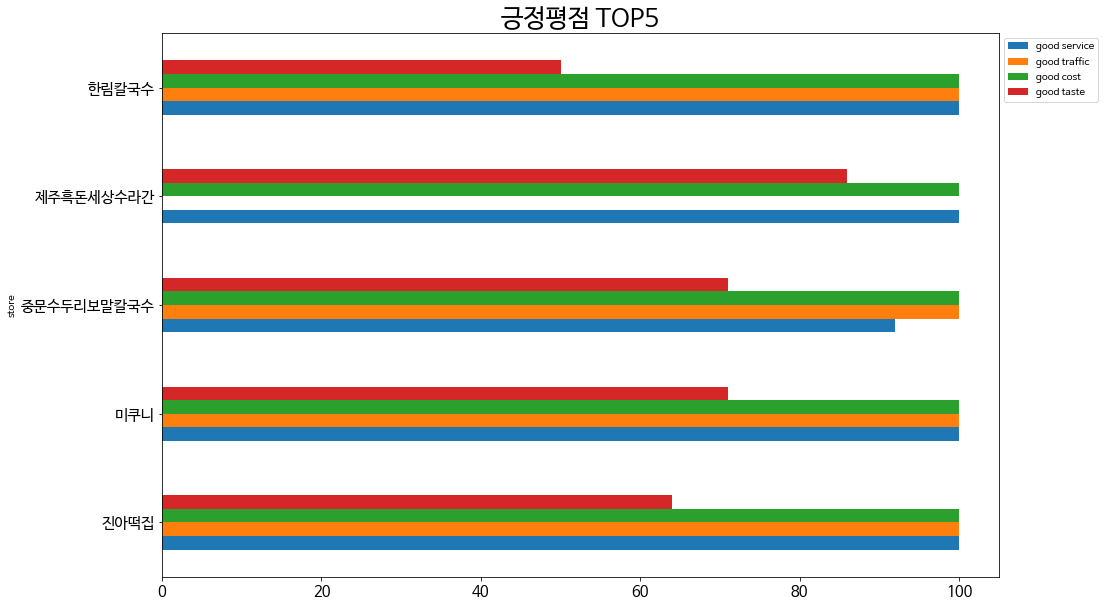

In [ ]:
ax = senti_good5.plot(x='store',kind='barh',figsize=(15,10),fontsize=15)
ax.set_title('긍정평점 TOP5',fontsize=25)
ax.legend(bbox_to_anchor=(1,1))

In [ ]:
# 부정평점높이 받은 5개 뽑기
senti_bad5 = senti.sort_values(ascending=False,by=['bad_senti'])[:5]
senti_bad5.drop(columns=['total review','good service','good traffic','good cost','good taste','good_senti','bad_senti'],inplace=True)
senti_bad5

,store,bad service,bad traffic,bad cost,bad taste
55,우유부단,100,100,73,29
224,놀맨,100,100,50,67
152,애월더선셋,25,0,80,100
178,델문도,77,25,87,55
81,시스터필드,100,0,100,8


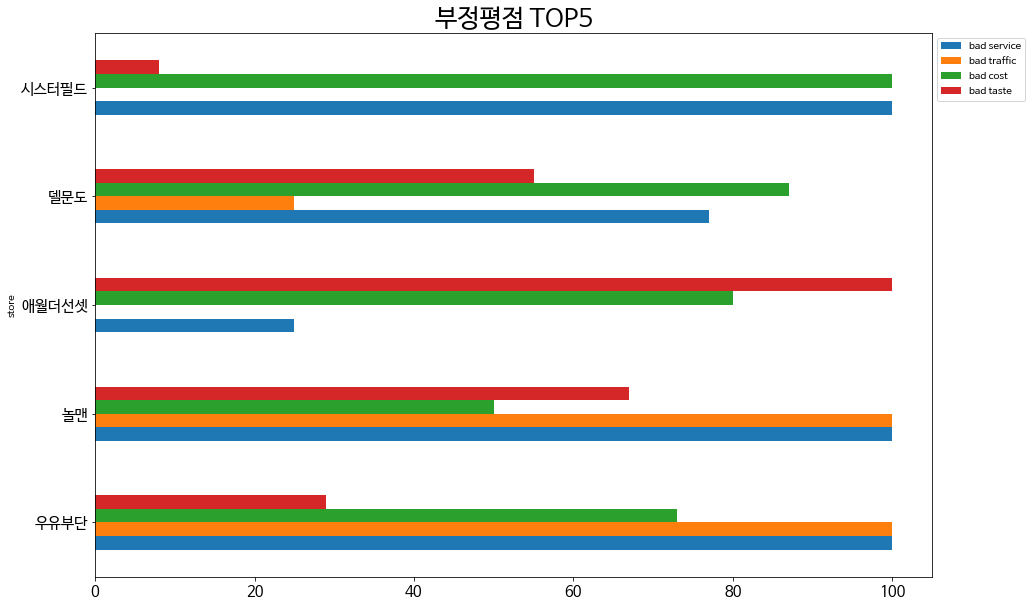

In [ ]:
ax = senti_bad5.plot(x='store',kind='barh',figsize=(15,10),fontsize=15)
ax.set_title('부정평점 TOP5',fontsize=25)
ax.legend(bbox_to_anchor=(1,1))